In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


We start by downloading the mnist dataset from the keras datasets api

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
train_x[0].shape

(28, 28)

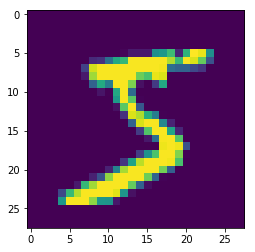

In [5]:
plt.imshow(train_x[0])

In [6]:
train_y[0]

5

We transform the (28,28) dimensional matrix to a vector of size (28*28,1)

In [7]:
def preprocess(x):
    x = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))
    x = x[:] / 255.
    return x 

def to_categorical(y, num_classes):
    res = np.zeros((y.shape[0], num_classes))
    res[np.arange(y.shape[0]), y] = 1.
    return res

In [8]:
train_x = preprocess(train_x)
train_y = to_categorical(train_y, 10)

In [9]:
print(train_x.shape)
print(train_y.shape)

(60000, 784)
(60000, 10)


In [10]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Softmax is an activation function that outputs probabilities for multi-class classification problems. It is similar to a sigmoid output which is often used for outputing a single probability. Softmax makes sure that the sum of the individual probabilities equals to 1. 

Softmax formula:

$p_i = \dfrac{e^{a_i}}{\sum^N_{k=1} e^{a_k}}$ - Equation 1: Softmax

By using the exponential function it gives more weight to higher probabilities. It gives an advantage to higher values. Therefore it's called a soft max function. A max function would give 100% probability to the highest value, softmax is somewhere in between max and an actual probability as given by equation 2:

$p_i = \dfrac{a_i}{\sum^N_{k=1} a_k}$ - Equation 2: Standard linear probability

There is however a problem with using the regular softmax function, as it uses an exponential function chances are high that it will encounter an overflow. To overcome this, we can subtract the a values by its maximum.


In [128]:
def softmax(a):
    exp_term = np.exp(a - np.max(a, axis=1, keepdims=True)) #-max to Prevent overflow
    res = exp_term/np.sum(exp_term, axis=1, keepdims=True)
    return res

def cross_entropy_loss(outputs, y):
    o = np.clip(outputs, 1e-7, 1 - 1e-7) #Prevent divide by zero warnings
    loss = -np.sum(y * np.log(o), axis=1)
    return np.sum(loss) / outputs.shape[0] #average loss of all samples
    
def relu(a):
    return np.maximum(0, a)

def tanh(a):
    return np.tanh(a)

In [119]:
a = np.array([[1,2], [3,4]])
print(np.sum(a, axis=1, keepdims=False))

[3 7]


In [120]:
def forward_pass(a, W, B, activation):
    z = a.dot(W) + B
    next_a = activation(z)
    return next_a

In [124]:
class model():
    def __init__(self, input_data):
        self.input_data = input_data
        self.m, self.n = input_data.shape
        self.first_layer_nodes = 128
        self.output_layer_nodes = 10

        self.W1 = np.random.random((self.n, self.first_layer_nodes))
        self.B1 = np.random.random((1, self.first_layer_nodes))
        self.W2 = np.random.random((self.first_layer_nodes, self.output_layer_nodes))
        self.B2 = np.random.random((1, self.output_layer_nodes))
    
    def forward_pass(self): 
        self.a1 = self.input_data
        self.a2 = forward_pass(self.a1, self.W1, self.B1, tanh)
        self.output = forward_pass(self.a2, self.W2, self.B2, softmax)
        return cross_entropy_loss(self.output, train_y)
    
    def backward_pass(self):
        dw2 = self.a2.T.dot(self.output - train_y)
        db2 = np.sum(self.output - train_y, axis=0, keepdims=True)
        
        da2 = (self.output - train_y).dot((self.W2).T)
        dz1 = da2 * (1 - np.power(self.a2, 2))
        dw1 = self.a1.T.dot(dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        self.W1 -= 0.01 * dw1
        self.B1 -= 0.01 * db1
        self.W2 -= 0.01 * dw2
        self.B2 -= 0.01 * db2
        
        
    def error():
        pass

m = model(train_x)
for i in range(100):
    loss = m.forward_pass()
    print(loss)
    m.backward_pass()

[1.77626365e-02 7.37209620e-03 1.71534329e-05 9.81799914e-05
 1.28840546e-02 7.45288127e-03 8.34759579e-01 7.87953848e-02
 1.85850079e-02 2.22730267e-02]
4.897618764271143
[0.00000000e+000 1.00000000e+000 2.34762621e-195 2.11905312e-100
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
14.3069589808823
[0.0000000e+000 0.0000000e+000 1.3273565e-192 1.0000000e+000
 0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000
 0.0000000e+000 0.0000000e+000]
14.471094920576226
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
14.517568762748157
[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.15471673e-018 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.06427321e-189 5.61293545e-094]
14.52697098515288
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 5.44279379e-167 2.29862011e-016]
14.548730414146673
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0000000

KeyboardInterrupt: 

In [113]:
from keras.layers import Input, Dense
from keras.models import Sequential

In [115]:
km = Sequential()
km.add(Dense(128, activation='tanh', input_shape=(28*28,)))
km.add(Dense(10, activation='softmax'))
km.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [116]:
km.fit(train_x, train_y, batch_size=60000, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 4s 72us/step - loss: 2.4927 - acc: 0.0895
Epoch 2/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.4589 - acc: 0.0936
Epoch 3/100
60000/60000 [==============================] - 0s 8us/step - loss: 2.4282 - acc: 0.1002
Epoch 4/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.4000 - acc: 0.1077
Epoch 5/100
60000/60000 [==============================] - 0s 7us/step - loss: 2.3739 - acc: 0.1165
Epoch 6/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.3496 - acc: 0.1258
Epoch 7/100
60000/60000 [==============================] - 0s 7us/step - loss: 2.3267 - acc: 0.1355
Epoch 8/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.3050 - acc: 0.1463
Epoch 9/100
60000/60000 [==============================] - 0s 7us/step - loss: 2.2844 - acc: 0.1580
Epoch 10/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.2646 - acc: 0.170

Epoch 83/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4336 - acc: 0.6952
Epoch 84/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4266 - acc: 0.6976
Epoch 85/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4196 - acc: 0.6996
Epoch 86/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4126 - acc: 0.7017
Epoch 87/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4058 - acc: 0.7037
Epoch 88/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3990 - acc: 0.7056
Epoch 89/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3923 - acc: 0.7075
Epoch 90/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3857 - acc: 0.7096
Epoch 91/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3792 - acc: 0.7116
Epoch 92/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.3727 - ac

Ref: https://deepnotes.io/softmax-crossentropy

http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/